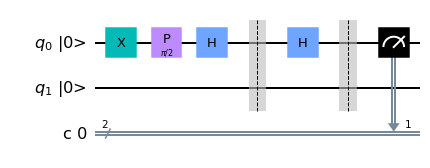

In [1]:
import numpy as np

from qiskit import QuantumRegister, ClassicalRegister
from qiskit import (QuantumCircuit, execute, Aer, assemble)
from qiskit.visualization import plot_histogram, plot_bloch_multivector

sim = Aer.get_backend('qasm_simulator')

# not used, but...
# qc = QuantumRegister(2)
# cl = ClassicalRegister(2)

circ = QuantumCircuit(2, 2)

circ.x(0)
teta = np.pi/2
circ.p(teta, 0)
circ.h(0)
circ.barrier()
circ.h(0)

circ.barrier()

circ.measure(0,1)
circ.draw('mpl',initial_state = True, scale = 1)

{'10': 1024}


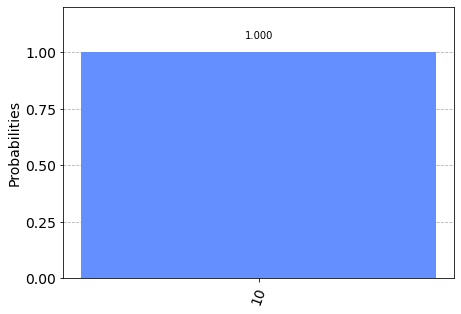

In [2]:
simulator = Aer.get_backend('qasm_simulator')
# memory - підчас виконання компютер запамятовує попередній резульат 
result = execute(circ, backend=simulator, shots=1024, memory = True).result()
counts = result.get_counts()

# not used, but...
# m = result.get_memory(qc)
#print(m)

print(counts)
plot_histogram(counts)

c:\users\mike\appdata\local\programs\python\python39\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


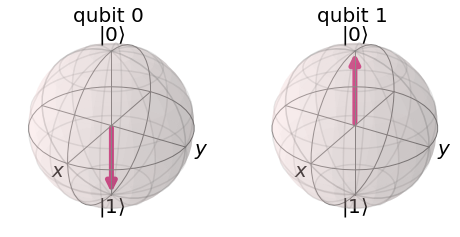

In [3]:
sv_sim = Aer.get_backend("statevector_simulator")
qobj = assemble(circ)
statevector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(statevector)

In [4]:
# Real Quantum Computers
from qiskit import IBMQ

# used only for first time, then you should use IBMQ.load_account()
# TOKEN = 'smth from IBM API token'
# IBMQ.save_account(TOKEN)

IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')
device = provider.get_backend('ibmq_qasm_simulator')

In [ ]:
job = execute(
    circ, 
    backend=device, 
    shots=1024, 
    memory = True)

print(f'{job.job_id() = }')
from qiskit.tools.monitor import job_monitor
# Status of real job in real Quantum Computer
job_monitor(job)

job.job_id() = '60769ae54638591489b6236c'
Job Status: job is being validated

In [ ]:
device_result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)


c:\users\mike\appdata\local\programs\python\python39\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


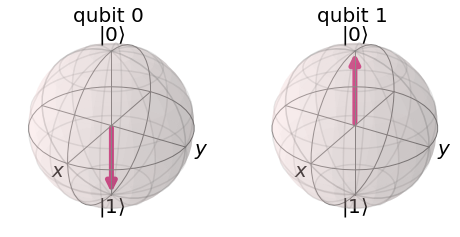

In [7]:
sv_sim = Aer.get_backend("statevector_simulator")
qobj = assemble(circ)
statevector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(statevector)

In [8]:
# The work is done
# Further information is available at the links:
# https://youtu.be/yuDxHJOKsVA
# https://youtu.be/a9yqCeiPOp4